## Problem Statement

Porter is India's Largest Marketplace for Intra-City Logistics. Leader in the country's $40 billion intra-city logistics market, Porter strives to improve the lives of 1,50,000+ driver-partners by providing them with consistent earning & independence. Currently, the company has serviced 5+ million customers

Porter works with a wide range of restaurants for delivering their items directly to the people.

Porter has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners.

**Data Dictionary**

- Each row in this file corresponds to one unique delivery. Each column corresponds to a feature as explained below.

1. market_id : integer id for the market where the restaurant lies
2. created_at : the timestamp at which the order was placed
3. actual_delivery_time : the timestamp when the order was delivered
4. store_primary_category : category for the restaurant
5. order_protocol : integer code value for order protocol(how the order was placed ie: through porter, call to restaurant, pre booked, third part etc)
6. total_items subtotal : final price of the order
7. num_distinct_items : the number of distinct items in the order
8. min_item_price : price of the cheapest item in the order
9. max_item_price : price of the costliest item in order
10. total_onshift_partners : number of delivery partners on duty at the time order was placed
11. total_busy_partners : number of delivery partners attending to other tasks
12. total_outstanding_orders : total number of orders to be fulfilled at the moment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [3]:
from category_encoders import TargetEncoder

In [4]:
df = pd.read_csv('dataset.csv')
df

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,c81e155d85dae5430a8cee6f2242e82c,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [6]:
df.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,196441.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000
mean,2.978706,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065
std,1.524867,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830
min,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000
50%,3.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000
75%,4.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000
max,6.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000


In [7]:
df.describe(include='object')

,created_at,actual_delivery_time,store_id,store_primary_category
count,197428,197421,197428,192668
unique,180985,178110,6743,74
top,2015-02-11 19:50:43,2015-02-11 20:40:45,d43ab110ab2489d6b9b2caa394bf920f,american
freq,6,5,937,19399


In [8]:
df.loc[df['created_at']=='2015-02-11 19:50:43']

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
49808,1.0,2015-02-11 19:50:43,2015-02-11 20:36:59,6d0f846348a856321729a2f36734d1a7,american,5.0,1,1400,1,1400,1400,22.0,21.0,19.0
49824,1.0,2015-02-11 19:50:43,2015-02-11 20:36:59,6d0f846348a856321729a2f36734d1a7,american,5.0,1,1400,1,1400,1400,22.0,21.0,21.0
49826,1.0,2015-02-11 19:50:43,2015-02-11 20:36:59,6d0f846348a856321729a2f36734d1a7,american,5.0,1,1400,1,1400,1400,22.0,22.0,22.0
148833,2.0,2015-02-11 19:50:43,2015-02-11 20:32:15,973a5f0ccbc4ee3524ccf035d35b284b,mediterranean,3.0,8,6392,6,499,999,37.0,35.0,47.0
148857,2.0,2015-02-11 19:50:43,2015-02-11 20:32:15,973a5f0ccbc4ee3524ccf035d35b284b,mediterranean,3.0,8,6392,6,499,999,39.0,32.0,48.0
148862,2.0,2015-02-11 19:50:43,2015-02-11 20:32:15,973a5f0ccbc4ee3524ccf035d35b284b,mediterranean,3.0,8,6392,6,499,999,37.0,34.0,46.0


In [9]:
df.loc[df['actual_delivery_time']=='2015-02-11 20:40:45']

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
111433,1.0,2015-02-11 19:50:19,2015-02-11 20:40:45,527bf9aab6ed58084dc0f026ab7a82cf,NaN,4.0,4,1052,2,227,299,19.0,17.0,15.0
111434,1.0,2015-02-11 19:50:19,2015-02-11 20:40:45,527bf9aab6ed58084dc0f026ab7a82cf,NaN,4.0,4,1052,2,227,299,17.0,15.0,13.0
111436,1.0,2015-02-11 19:50:19,2015-02-11 20:40:45,527bf9aab6ed58084dc0f026ab7a82cf,NaN,4.0,4,1052,2,227,299,18.0,15.0,13.0
174945,2.0,2015-02-11 19:52:10,2015-02-11 20:40:45,435d6ab1ba16ba7e05e09d9728bc36ca,sandwich,3.0,3,1697,3,299,529,55.0,51.0,67.0
175029,2.0,2015-02-11 19:52:10,2015-02-11 20:40:45,435d6ab1ba16ba7e05e09d9728bc36ca,sandwich,3.0,3,1697,3,299,529,57.0,52.0,67.0


## Data preprocessing and feature engineering

In [10]:
for i in df.columns:
    if df[i].nunique() <30:
        print(i, ':', np.sort(df[i].unique()))

market_id : [ 1.  2.  3.  4.  5.  6. nan]
order_protocol : [ 1.  2.  3.  4.  5.  6.  7. nan]
num_distinct_items : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [11]:
missing_data = pd.DataFrame({'is_null':df.isna().any(), 'null_count':df.isna().sum(), 'null_percent':(df.isna().sum()/df.shape[0]*100).round(2)})
missing_data

,is_null,null_count,null_percent
market_id,True,987,0.50
created_at,False,0,0.00
actual_delivery_time,True,7,0.00
store_id,False,0,0.00
store_primary_category,True,4760,2.41
order_protocol,True,995,0.50
total_items,False,0,0.00
subtotal,False,0,0.00
num_distinct_items,False,0,0.00
min_item_price,False,0,0.00


In [12]:
df.duplicated(keep='last').value_counts()

False    197428
Name: count, dtype: int64

In [13]:
dup_cols = list(set(df.columns) - set(['total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders']))

In [14]:
df.duplicated(subset=dup_cols, keep='last').value_counts()

False    197294
True        134
Name: count, dtype: int64

In [15]:
df.drop_duplicates(subset=dup_cols, keep='last', inplace=True, ignore_index=True)

In [16]:
df.shape

(197294, 14)

In [17]:
df.loc[df['actual_delivery_time'].isna()].index

Index([109, 7660, 78462, 115905, 140549, 158866, 170305], dtype='int64')

In [18]:
idx = df.loc[df['actual_delivery_time'].isna()].index.tolist()

In [19]:
df = df.drop(index=idx)

In [20]:
df.reset_index(drop=True, inplace=True)

In [21]:
df.shape

(197287, 14)

In [22]:
df['Target'] = (pd.to_datetime(df['actual_delivery_time']) - pd.to_datetime(df['created_at']))
df

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,Target
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,0 days 01:02:59
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,0 days 01:07:04
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,0 days 00:29:41
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,0 days 00:51:15
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,0 days 00:39:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197282,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,0 days 01:05:07
197283,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,0 days 00:56:23
197284,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,0 days 00:50:08
197285,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,c81e155d85dae5430a8cee6f2242e82c,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,0 days 01:05:07


In [23]:
df['delivery_time_min'] = (df['Target'].dt.total_seconds()/60).round(2)

In [24]:
df

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,Target,delivery_time_min
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,0 days 01:02:59,62.98
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,0 days 01:07:04,67.07
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,0 days 00:29:41,29.68
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,0 days 00:51:15,51.25
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,0 days 00:39:50,39.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197282,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,0 days 01:05:07,65.12
197283,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,0 days 00:56:23,56.38
197284,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,0 days 00:50:08,50.13
197285,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,c81e155d85dae5430a8cee6f2242e82c,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,0 days 01:05:07,65.12


In [25]:
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df['created_at'] = pd.to_datetime(df['created_at'])

In [26]:
df['order_hour'] = df['created_at'].dt.hour

In [27]:
df['order_day'] = df['created_at'].dt.day

In [28]:
df

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,Target,delivery_time_min,order_hour,order_day
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,0 days 01:02:59,62.98,22,6
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,0 days 01:07:04,67.07,21,10
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,0 days 00:29:41,29.68,20,22
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,0 days 00:51:15,51.25,21,3
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,0 days 00:39:50,39.83,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197282,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,0 days 01:05:07,65.12,0,17
197283,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,0 days 00:56:23,56.38,0,13
197284,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,0 days 00:50:08,50.13,4,24
197285,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,c81e155d85dae5430a8cee6f2242e82c,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,0 days 01:05:07,65.12,18,1


In [58]:
# impute market_id and order_protocol features with most_frequent values
impute_mode = SimpleImputer(strategy = 'most_frequent')
impute_mode.fit(df[['market_id', 'order_protocol', 'store_primary_category']])
df[['market_id', 'order_protocol', 'store_primary_category']] = impute_mode.transform(df[['market_id', 'order_protocol', 'store_primary_category']])

In [30]:
df2 = df[['market_id', 'order_protocol', 'total_onshift_partners', 'order_hour']]
scaler = MinMaxScaler()
df2 = pd.DataFrame(scaler.fit_transform(df2), columns = df2.columns)

imputer = KNNImputer(n_neighbors = 5)
df2 = pd.DataFrame(imputer.fit_transform(df2), columns = df2.columns)

In [31]:
df2.isna().sum()

market_id                 0
order_protocol            0
total_onshift_partners    0
order_hour                0
dtype: int64

In [32]:
df2 = pd.DataFrame(scaler.inverse_transform(df2), columns=df2.columns)

In [33]:
df2

,market_id,order_protocol,total_onshift_partners,order_hour
0,1.0,1.0,33.0,22.0
1,2.0,2.0,1.0,21.0
2,3.0,1.0,1.0,20.0
3,3.0,1.0,1.0,21.0
4,3.0,1.0,6.0,2.0
...,...,...,...,...
197282,1.0,4.0,17.0,0.0
197283,1.0,4.0,12.0,0.0
197284,1.0,4.0,39.0,4.0
197285,1.0,1.0,7.0,18.0


In [34]:
df['total_onshift_partners'] = df2['total_onshift_partners']

In [35]:
df3 = df[['market_id', 'order_protocol', 'total_busy_partners', 'order_hour', 'total_onshift_partners']]
scaler = MinMaxScaler()
df3 = pd.DataFrame(scaler.fit_transform(df3), columns = df3.columns)

imputer = KNNImputer(n_neighbors = 5)
df3 = pd.DataFrame(imputer.fit_transform(df3), columns = df3.columns)

In [36]:
df3.isna().sum()

market_id                 0
order_protocol            0
total_busy_partners       0
order_hour                0
total_onshift_partners    0
dtype: int64

In [37]:
df3 = pd.DataFrame(scaler.inverse_transform(df3), columns=df3.columns)

In [38]:
df3

,market_id,order_protocol,total_busy_partners,order_hour,total_onshift_partners
0,1.0,1.0,14.0,22.0,33.0
1,2.0,2.0,2.0,21.0,1.0
2,3.0,1.0,0.0,20.0,1.0
3,3.0,1.0,1.0,21.0,1.0
4,3.0,1.0,6.0,2.0,6.0
...,...,...,...,...,...
197282,1.0,4.0,17.0,0.0,17.0
197283,1.0,4.0,11.0,0.0,12.0
197284,1.0,4.0,41.0,4.0,39.0
197285,1.0,1.0,7.0,18.0,7.0


In [39]:
df['total_busy_partners'] = df3['total_busy_partners']

In [40]:
df4 = df[['market_id', 'order_protocol', 'total_onshift_partners', 'total_outstanding_orders', 'order_hour', 'total_busy_partners']]
scaler = MinMaxScaler()
df4 = pd.DataFrame(scaler.fit_transform(df4), columns = df4.columns)

imputer = KNNImputer(n_neighbors = 5)
df4 = pd.DataFrame(imputer.fit_transform(df4), columns = df4.columns)

In [41]:
df4.isna().sum()

market_id                   0
order_protocol              0
total_onshift_partners      0
total_outstanding_orders    0
order_hour                  0
total_busy_partners         0
dtype: int64

In [42]:
df4 = pd.DataFrame(scaler.inverse_transform(df4), columns=df4.columns)

In [43]:
df4

,market_id,order_protocol,total_onshift_partners,total_outstanding_orders,order_hour,total_busy_partners
0,1.0,1.0,33.0,21.0,22.0,14.0
1,2.0,2.0,1.0,2.0,21.0,2.0
2,3.0,1.0,1.0,0.0,20.0,0.0
3,3.0,1.0,1.0,2.0,21.0,1.0
4,3.0,1.0,6.0,9.0,2.0,6.0
...,...,...,...,...,...,...
197282,1.0,4.0,17.0,23.0,0.0,17.0
197283,1.0,4.0,12.0,14.0,0.0,11.0
197284,1.0,4.0,39.0,40.0,4.0,41.0
197285,1.0,1.0,7.0,12.0,18.0,7.0


In [44]:
df['total_outstanding_orders'] = df4['total_outstanding_orders']

In [45]:
df['store_primary_category'].nunique()

74

In [46]:
df['store_id'].nunique()

6743

In [59]:
missing_data = pd.DataFrame({'is_null':df.isna().any(), 'null_count':df.isna().sum(), 'null_percent':(df.isna().sum()/df.shape[0]*100).round(2)})
missing_data

,is_null,null_count,null_percent
market_id,False,0,0.0
created_at,False,0,0.0
actual_delivery_time,False,0,0.0
store_id,False,0,0.0
store_primary_category,False,0,0.0
order_protocol,False,0,0.0
total_items,False,0,0.0
subtotal,False,0,0.0
num_distinct_items,False,0,0.0
min_item_price,False,0,0.0


In [60]:
df.drop(columns='Target', inplace=True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197287 entries, 0 to 197286
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 197287 non-null  object        
 1   created_at                197287 non-null  datetime64[ns]
 2   actual_delivery_time      197287 non-null  datetime64[ns]
 3   store_id                  197287 non-null  object        
 4   store_primary_category    197287 non-null  object        
 5   order_protocol            197287 non-null  object        
 6   total_items               197287 non-null  int64         
 7   subtotal                  197287 non-null  int64         
 8   num_distinct_items        197287 non-null  int64         
 9   min_item_price            197287 non-null  int64         
 10  max_item_price            197287 non-null  int64         
 11  total_onshift_partners    197287 non-null  float64       
 12  to

### Encoding categorical columns

In [62]:
encoder = TargetEncoder()
df['store_id'] = encoder.fit_transform(df['store_id'], df['delivery_time_min'])

In [63]:
df['store_id']

0         50.358792
1         48.380350
2         48.380350
3         48.380350
4         48.380350
            ...    
197282    54.383929
197283    54.383929
197284    54.383929
197285    48.847521
197286    48.847521
Name: store_id, Length: 197287, dtype: float64

In [64]:
df['store_primary_category'] = encoder.fit_transform(df['store_primary_category'], df['delivery_time_min'])

In [65]:
df['store_primary_category']

0         47.947136
1         44.548352
2         47.947136
3         47.947136
4         47.947136
            ...    
197282    43.856281
197283    43.856281
197284    43.856281
197285    44.755293
197286    44.755293
Name: store_primary_category, Length: 197287, dtype: float64

## Data visualization and cleaning

### Visualization for various features

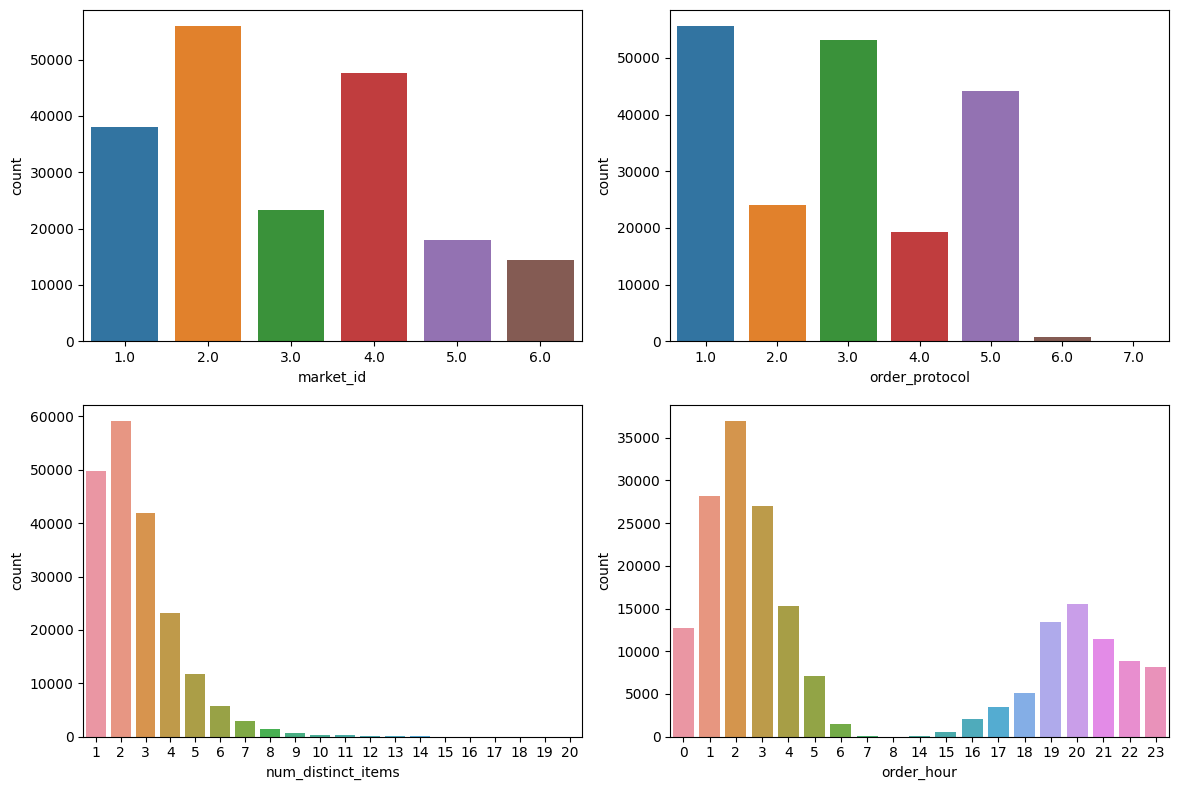

In [66]:
row, col = 0, 0
maxrow, maxcol = 2, 2
fig, axes = plt.subplots(maxrow, maxcol, figsize=(12,8))
for i in df.columns:
    if df[i].nunique() < 30:
        plt.tight_layout()
        sns.countplot(df, x=i, ax=axes[row, col])
        col += 1
        if col == maxcol:
            col = 0
            row += 1

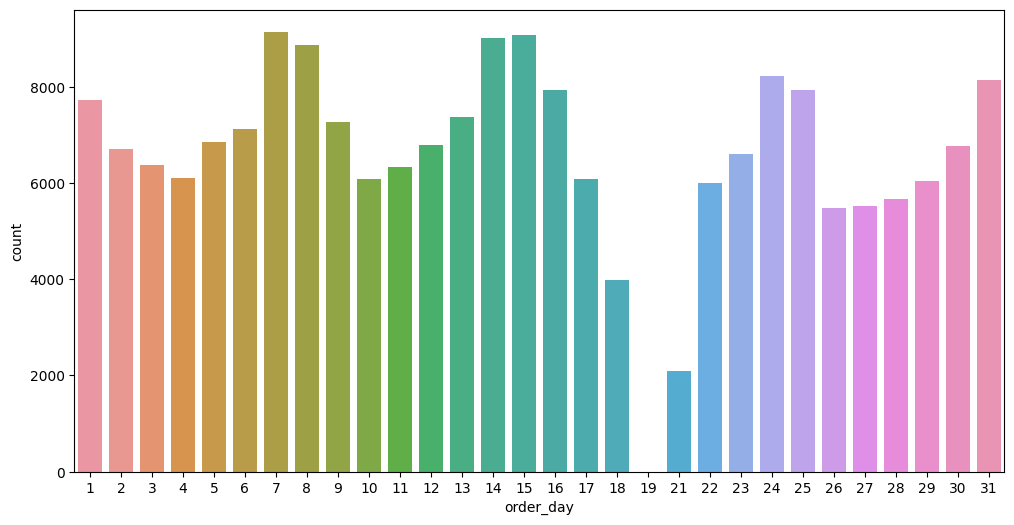

In [67]:
plt.figure(figsize=(12,6))
sns.countplot(df, x='order_day')
plt.show()

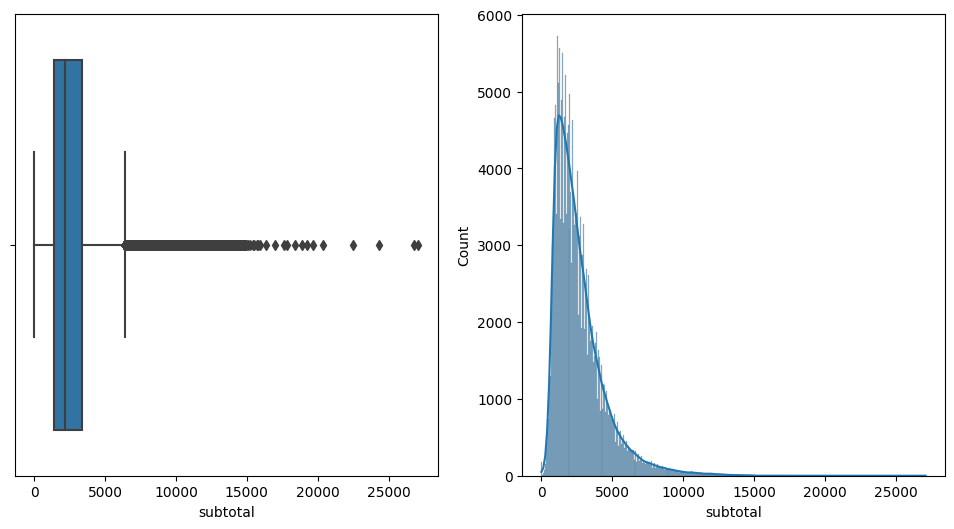

In [68]:
fix, axes = plt.subplots(1,2, figsize=(12,6))
sns.boxplot(df, x='subtotal', ax=axes[0])
sns.histplot(df, x='subtotal', kde=True, ax=axes[1])
plt.show()

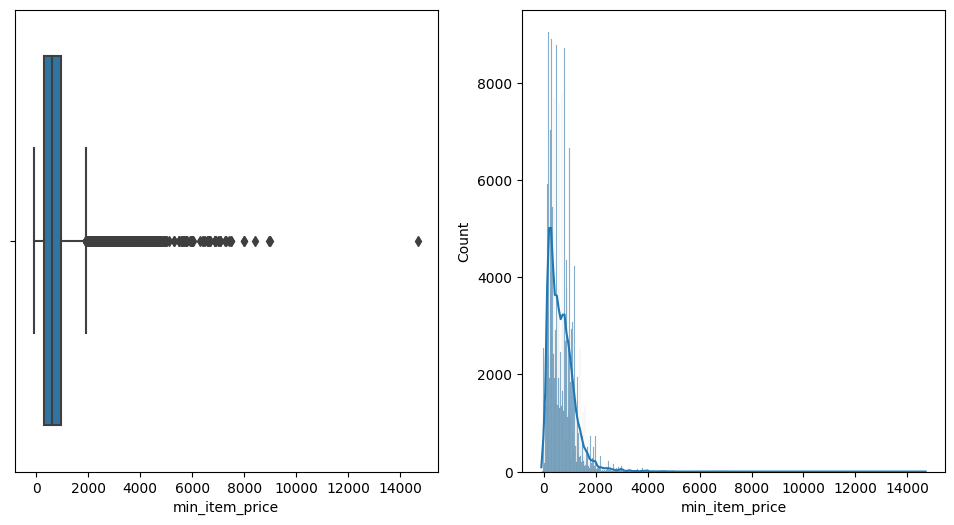

In [69]:
fix, axes = plt.subplots(1,2, figsize=(12,6))
sns.boxplot(df, x='min_item_price', ax=axes[0])
sns.histplot(df, x='min_item_price', kde=True, ax=axes[1])
plt.show()

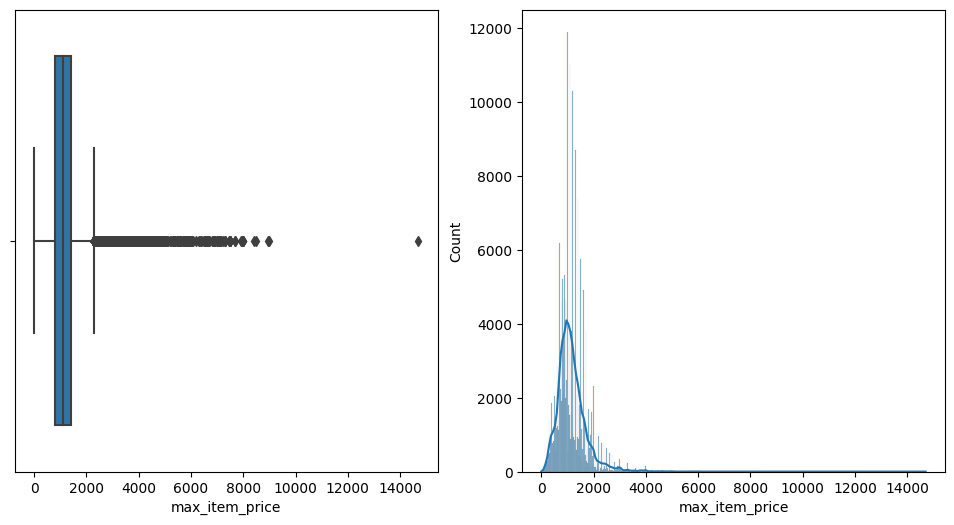

In [70]:
fix, axes = plt.subplots(1,2, figsize=(12,6))
sns.boxplot(df, x='max_item_price', ax=axes[0])
sns.histplot(df, x='max_item_price', kde=True, ax=axes[1])
plt.show()

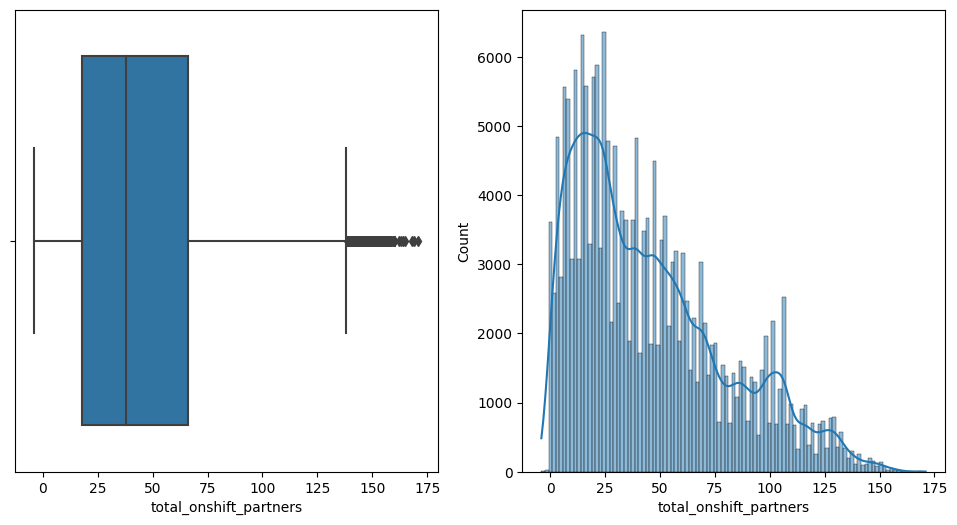

In [71]:
fix, axes = plt.subplots(1,2, figsize=(12,6))
sns.boxplot(df, x='total_onshift_partners', ax=axes[0])
sns.histplot(df, x='total_onshift_partners', kde=True, ax=axes[1])
plt.show()

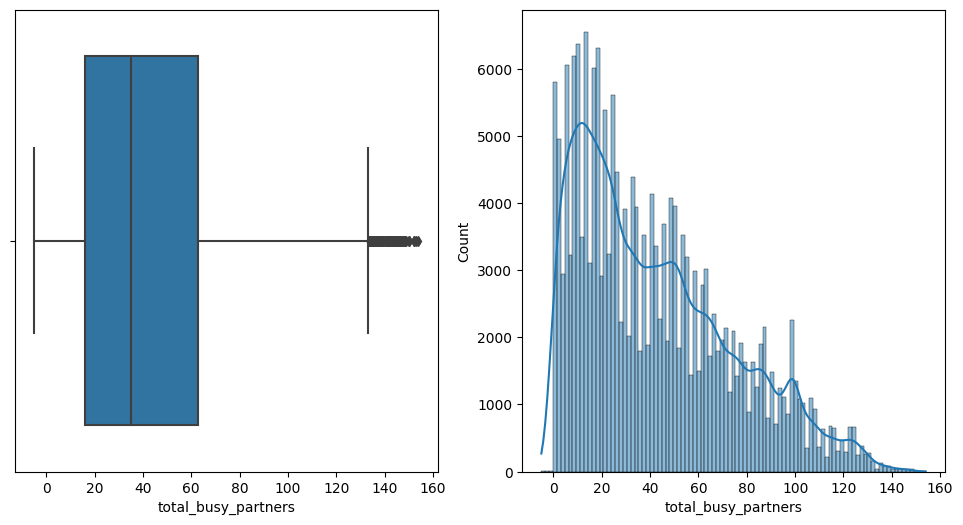

In [72]:
fix, axes = plt.subplots(1,2, figsize=(12,6))
sns.boxplot(df, x='total_busy_partners', ax=axes[0])
sns.histplot(df, x='total_busy_partners', kde=True, ax=axes[1])
plt.show()

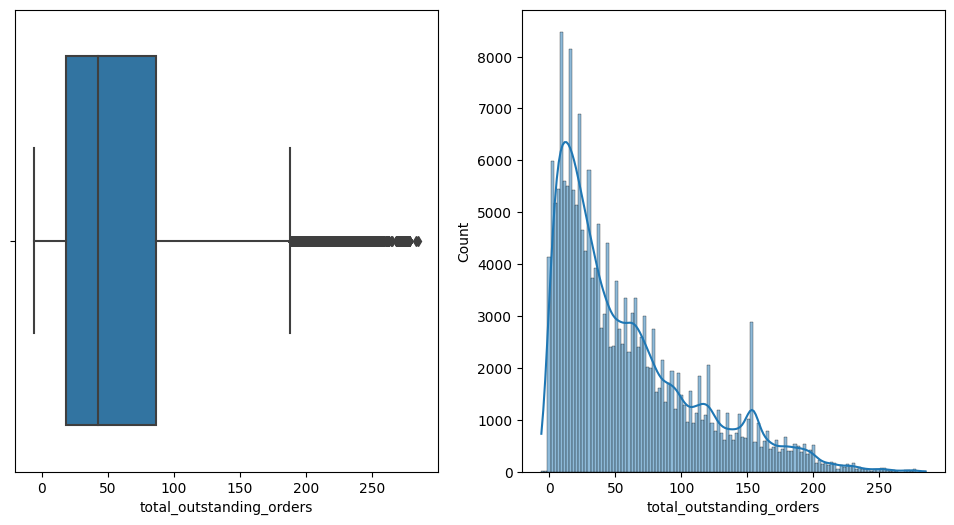

In [73]:
fix, axes = plt.subplots(1,2, figsize=(12,6))
sns.boxplot(df, x='total_outstanding_orders', ax=axes[0])
sns.histplot(df, x='total_outstanding_orders', kde=True, ax=axes[1])
plt.show()

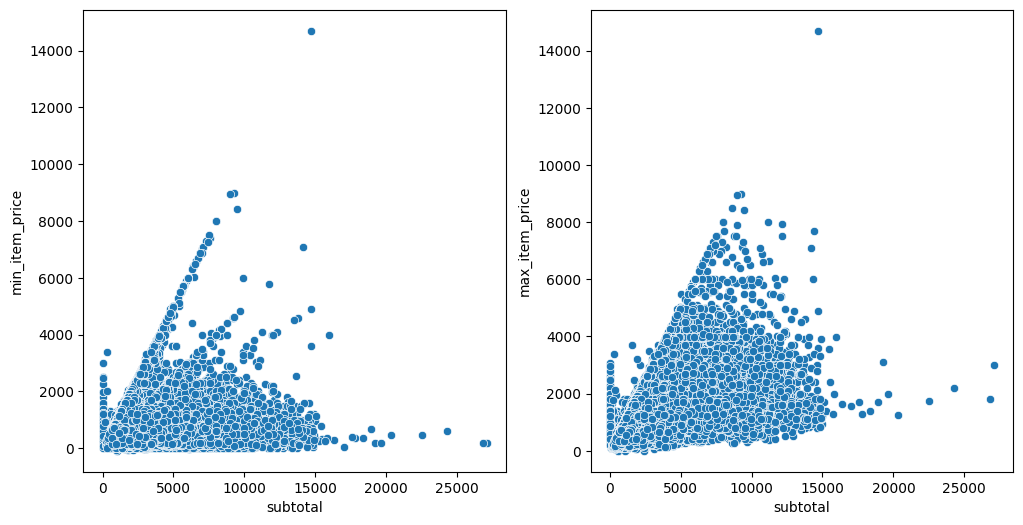

In [74]:
fix, axes = plt.subplots(1,2, figsize=(12,6))
sns.scatterplot(df, x='subtotal', y='min_item_price', ax=axes[0])
sns.scatterplot(df, x='subtotal', y='max_item_price', ax=axes[1])
plt.show()

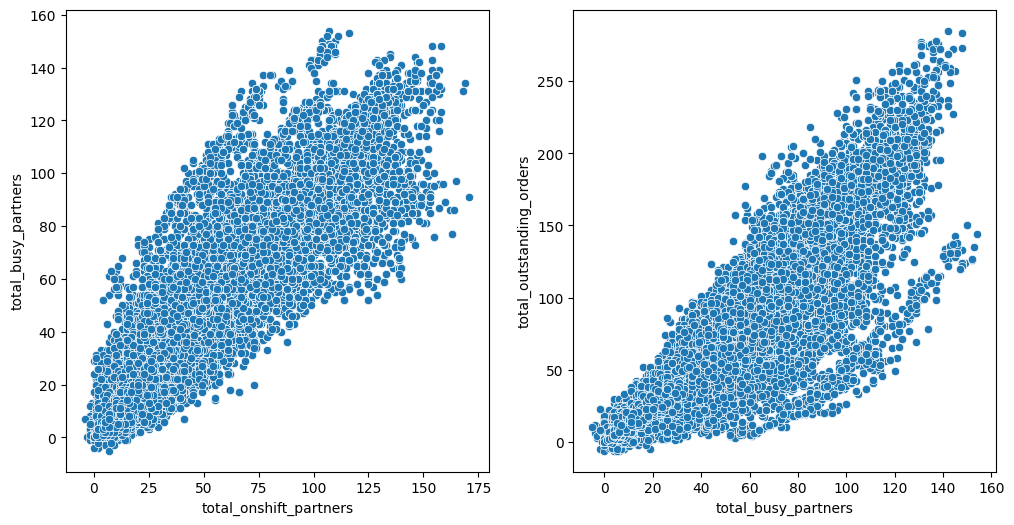

In [75]:
fix, axes = plt.subplots(1,2, figsize=(12,6))
sns.scatterplot(df, x='total_onshift_partners', y='total_busy_partners', ax=axes[0])
sns.scatterplot(df, x='total_busy_partners', y='total_outstanding_orders', ax=axes[1])
plt.show()

In [76]:
df.loc[(df['min_item_price']>df['max_item_price'])]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time_min,order_hour,order_day
165,6.0,2015-01-31 01:35:23,2015-01-31 02:16:43,52.219943,44.989535,2.0,2,1741,2,889,772,71.8,83.4,113.0,41.33,1,31
271,4.0,2015-01-24 03:03:18,2015-01-24 04:02:30,40.507522,44.548352,1.0,1,1403,1,1314,1292,129.0,127.0,205.0,59.20,3,24
1139,5.0,2015-01-31 20:10:47,2015-01-31 20:49:29,51.534210,47.947136,1.0,1,1289,1,1437,1400,21.0,13.0,19.0,38.70,20,31
1144,5.0,2015-01-30 02:20:58,2015-01-30 03:14:42,51.534210,47.947136,1.0,1,1828,1,2031,1935,24.0,21.0,23.0,53.73,2,30
1184,6.0,2015-02-10 22:37:10,2015-02-10 23:35:10,50.947601,47.276073,3.0,2,1926,2,674,657,23.8,19.4,21.8,58.00,22,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196707,4.0,2015-02-07 20:52:15,2015-02-07 21:28:58,41.768691,50.869342,3.0,1,3174,1,1513,1403,38.0,31.0,32.0,36.72,20,7
196891,4.0,2015-02-16 02:34:06,2015-02-16 03:20:42,39.771303,45.344405,5.0,2,2086,1,904,878,85.0,77.0,152.0,46.60,2,16
197002,4.0,2015-02-03 02:57:44,2015-02-03 03:41:32,39.771303,45.344405,5.0,2,2082,2,1020,928,88.0,87.0,150.0,43.80,2,3
197244,1.0,2015-01-30 19:24:55,2015-01-30 20:03:21,54.383929,43.856281,4.0,1,1142,1,737,701,22.0,19.0,32.0,38.43,19,30


In [77]:
df['max'] = np.where(df['min_item_price']>df['max_item_price'], df['min_item_price'],df['max_item_price'])
df['min'] = np.where(df['min_item_price']>df['max_item_price'], df['max_item_price'],df['min_item_price'])
df['max_item_price'] = df['max']
df['min_item_price'] = df['min']
df.drop(columns=['max','min'], inplace=True)

In [78]:
df

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time_min,order_hour,order_day
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,50.358792,47.947136,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.98,22,6
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,48.380350,44.548352,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.07,21,10
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,48.380350,47.947136,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,29.68,20,22
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,48.380350,47.947136,1.0,6,6900,5,600,1800,1.0,1.0,2.0,51.25,21,3
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,48.380350,47.947136,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,39.83,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197282,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,54.383929,43.856281,4.0,3,1389,3,345,649,17.0,17.0,23.0,65.12,0,17
197283,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,54.383929,43.856281,4.0,6,3010,4,405,825,12.0,11.0,14.0,56.38,0,13
197284,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,54.383929,43.856281,4.0,5,1836,3,300,399,39.0,41.0,40.0,50.13,4,24
197285,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,48.847521,44.755293,1.0,1,1175,1,535,535,7.0,7.0,12.0,65.12,18,1


In [79]:
df.loc[(df['min_item_price']>df['max_item_price'])]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time_min,order_hour,order_day


In [80]:
def remove_outlier_IQR(col_name):
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1
    
    upper_limit = Q3 + (1.5 * IQR)
    lower_limit = Q1 - (1.5 * IQR)
    
    df_cap = df.copy()
    df_cap[col_name] = np.where(df[col_name]>upper_limit, upper_limit, \
                               np.where(df[col_name]<lower_limit, lower_limit, df[col_name]))
    return df_cap

In [81]:
def remove_outlier_percentile(col_name):    
    upper_limit = df[col_name].quantile(0.99)
    lower_limit = df[col_name].quantile(0.01)
    
    df_cap = df.copy()
    df_cap[col_name] = np.where(df[col_name]>upper_limit, upper_limit, \
                               np.where(df[col_name]<lower_limit, lower_limit, df[col_name]))
    return df_cap

In [82]:
def remove_outlier_zscore(col_name):    
    upper_limit = df[col_name].mean() + 3*df[col_name].std()
    lower_limit = df[col_name].mean() - 3*df[col_name].std()
    
    df_cap = df.copy()
    df_cap[col_name] = np.where(df[col_name]>upper_limit, upper_limit, \
                               np.where(df[col_name]<lower_limit, lower_limit, df[col_name]))
    return df_cap

In [83]:
def plot_results_outlier_capped(col_name):
    fig, axes = plt.subplots(2,4, figsize=(12,6), sharey='row')
    plt.tight_layout()
    sns.boxplot(df, x=col_name, ax=axes[0,0])
    sns.boxplot(df_cap1, x=col_name, ax=axes[0,1])
    sns.boxplot(df_cap2, x=col_name, ax=axes[0,2])
    sns.boxplot(df_cap3, x=col_name, ax=axes[0,3])

    sns.histplot(df, x=col_name, kde=True, ax=axes[1,0])
    sns.histplot(df_cap1, x=col_name, kde=True, ax=axes[1,1])
    sns.histplot(df_cap2, x=col_name, kde=True, ax=axes[1,2])
    sns.histplot(df_cap3, x=col_name, kde=True, ax=axes[1,3])
    plt.show()

In [84]:
col_name = 'total_outstanding_orders'
df_cap1 = remove_outlier_IQR(col_name)
df_cap2 = remove_outlier_percentile(col_name)
df_cap3 = remove_outlier_zscore(col_name)

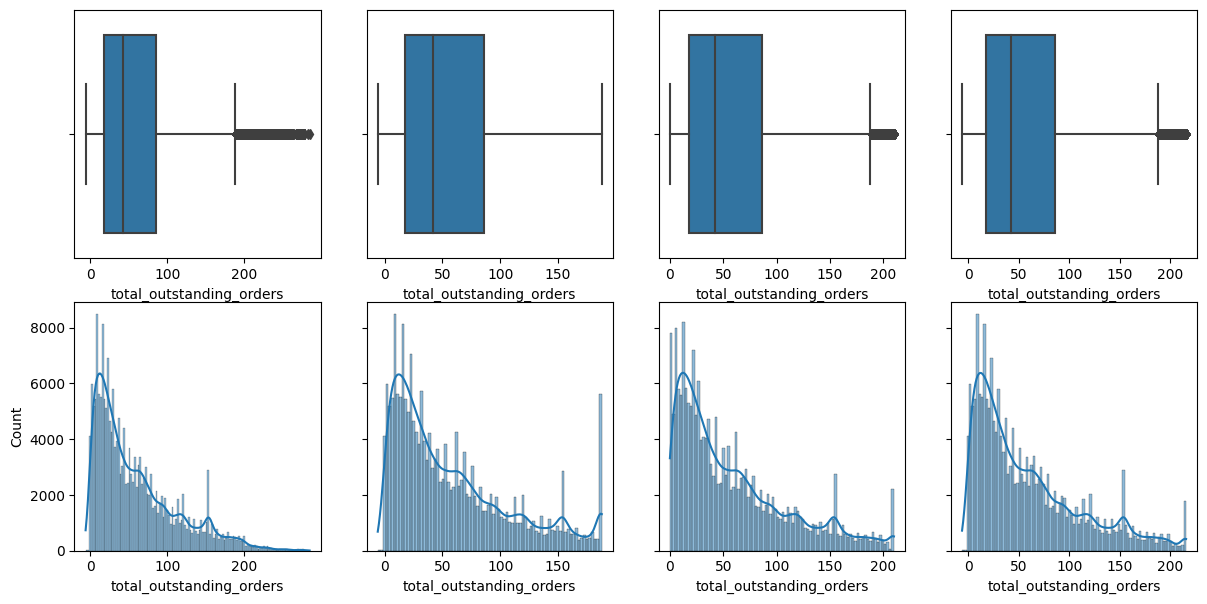

In [85]:
plot_results_outlier_capped(col_name)

In [86]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'delivery_time_min', 'order_hour',
       'order_day'],
      dtype='object')

In [87]:
new_df = df.copy()

In [88]:
new_df.drop(columns=['created_at', 'actual_delivery_time'], inplace=True)

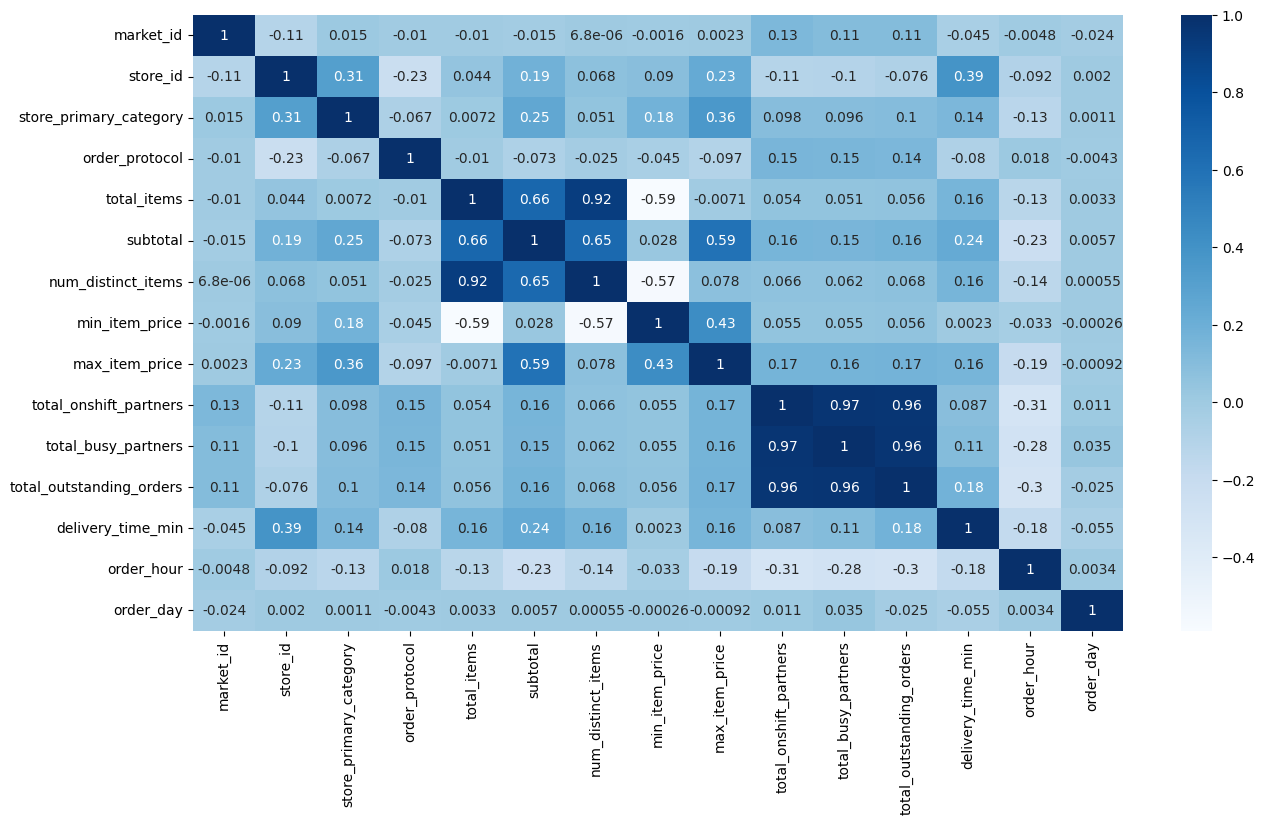

In [89]:
data = new_df.corr(method='spearman')
plt.figure(figsize=(15,8))
sns.heatmap(data, cmap='Blues', annot=True)
plt.show()

In [98]:
df['total_available_partners'] = df['total_onshift_partners'] - df['total_busy_partners']

In [93]:
new_df['total_available_partners'] = new_df['total_onshift_partners'] - new_df['total_busy_partners']

In [94]:
new_df.drop(columns=['total_onshift_partners', 'total_busy_partners'], inplace=True)

In [96]:
new_df.drop(columns=['num_distinct_items'], inplace=True)

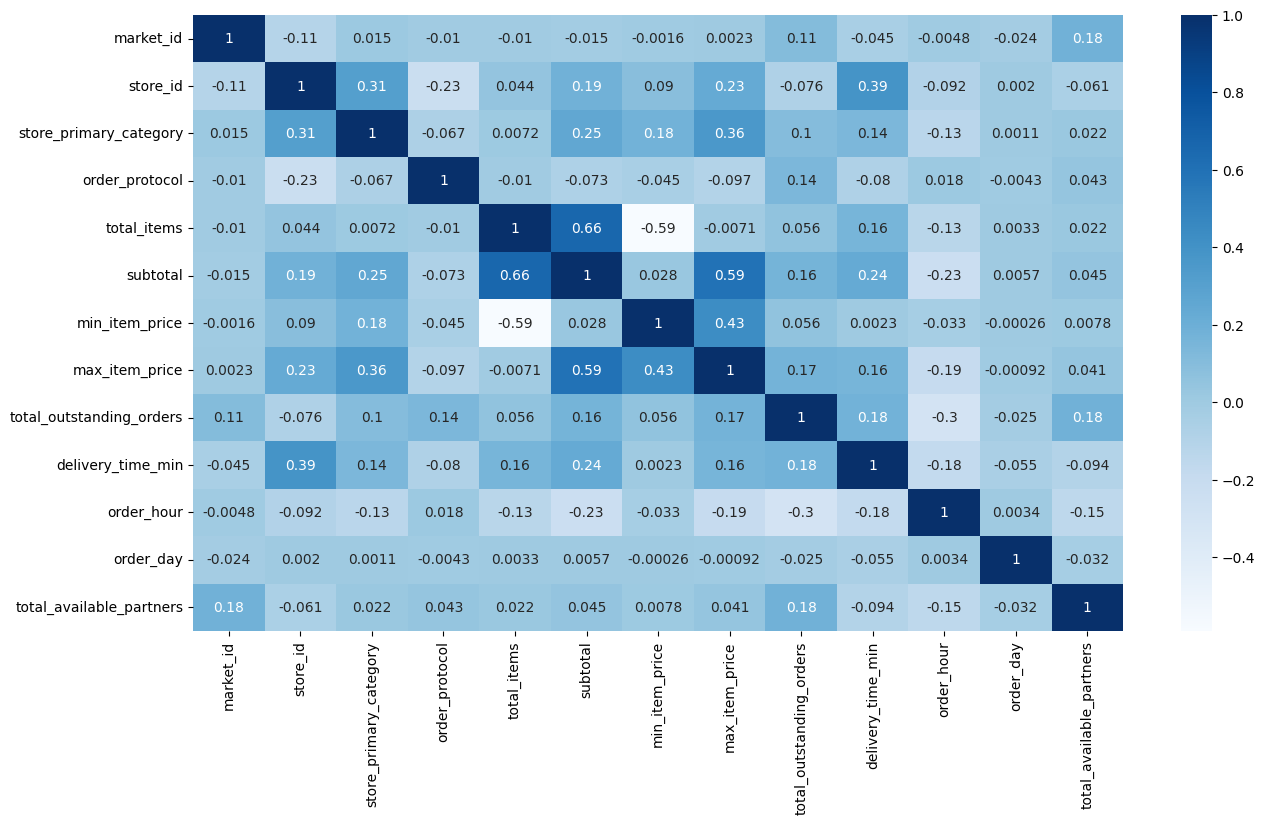

In [97]:
data = new_df.corr(method='spearman')
plt.figure(figsize=(15,8))
sns.heatmap(data, cmap='Blues', annot=True)
plt.show()

In [99]:
col_list = ['subtotal', 'min_item_price', 'max_item_price', 'total_available_partners', 'delivery_time_min', \
            'total_outstanding_orders']

for col in col_list:
    df_cap = remove_outlier_IQR(col)
    new_df[col] = df_cap[col]

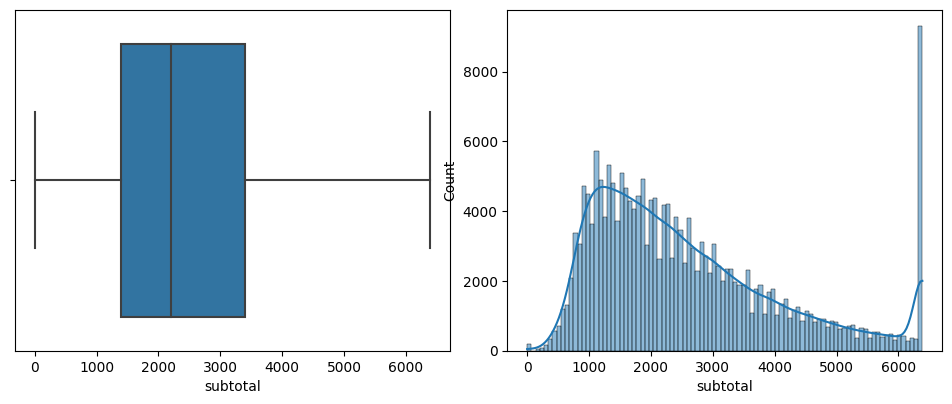

In [100]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
plt.tight_layout()
sns.boxplot(new_df, x='subtotal', ax=axes[0])
sns.histplot(new_df, x='subtotal', kde=True, ax=axes[1])
plt.show()

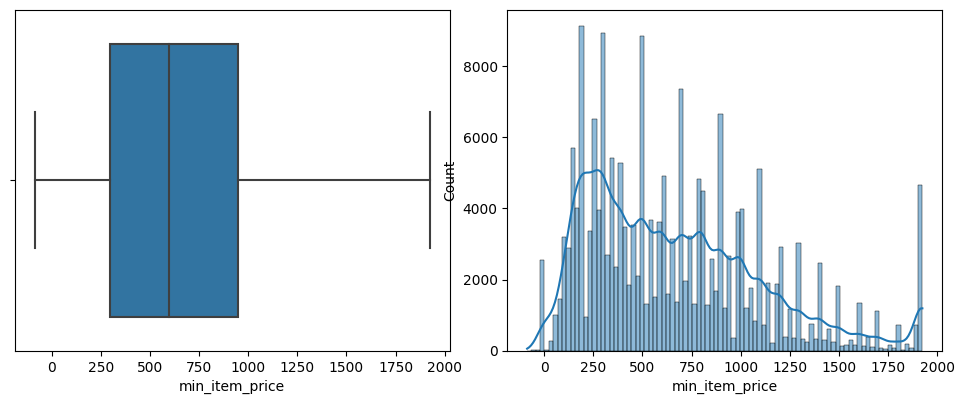

In [101]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
plt.tight_layout()
sns.boxplot(new_df, x='min_item_price', ax=axes[0])
sns.histplot(new_df, x='min_item_price', kde=True, ax=axes[1])
plt.show()

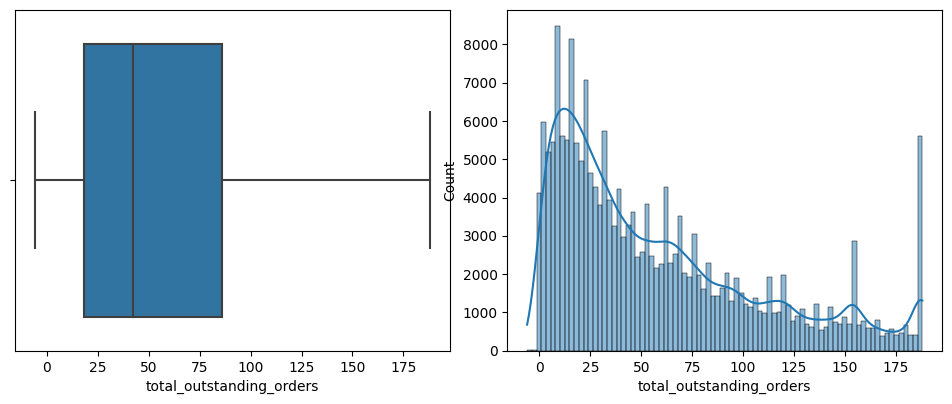

In [102]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
plt.tight_layout()
sns.boxplot(new_df, x='total_outstanding_orders', ax=axes[0])
sns.histplot(new_df, x='total_outstanding_orders', kde=True, ax=axes[1])
plt.show()

## Split the data in train and test

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [104]:
X = new_df.drop(columns='delivery_time_min')
y = new_df['delivery_time_min']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [106]:
print(X_train.shape, X_test.shape)

(157829, 12) (39458, 12)


## Creating a baseline model using random forest

In [107]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [108]:
rf_reg = RandomForestRegressor(n_estimators=500, max_features='sqrt', max_depth=5, random_state=42)

In [109]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=500,
                      random_state=42)

In [110]:
y_pred = rf_reg.predict(X_test)

In [111]:
y_pred

array([40.19898519, 40.4179082 , 50.25734193, ..., 43.69004051,
       48.70827258, 54.25143321])

In [112]:
MSE = round(mean_squared_error(y_test, y_pred),2)
RMSE = round(MSE**0.5,2)
MAE = round(mean_absolute_error(y_test, y_pred),2)
r2 = round(r2_score(y_test, y_pred),2)

print('MSE value = ', MSE)
print('RMSE value = ', RMSE)
print('MAE value = ', MAE)
print('r2 value = ', r2)

MSE value =  199.87
RMSE value =  14.14
MAE value =  11.16
r2 value =  0.24


In [113]:
grid_param = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [42]
}

In [114]:
gd_sr = GridSearchCV(estimator=RandomForestRegressor(),
                     param_grid=grid_param,
                     scoring='neg_root_mean_squared_error',
                     cv=5,
                     verbose=3,
                     n_jobs=-1)

In [115]:
gd_sr.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300, 400, 500],
                         'random_state': [42]},
             scoring='neg_root_mean_squared_error', verbose=3)

In [116]:
best_parameters = gd_sr.best_params_
print(best_parameters)

{'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 500, 'random_state': 42}


In [117]:
best_result = gd_sr.best_score_
print(best_result)

-13.892914387162751


In [118]:
rf_reg = RandomForestRegressor(n_estimators=500, max_features='sqrt', max_depth=7, random_state=42)

In [119]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, max_features='sqrt', n_estimators=500,
                      random_state=42)

In [120]:
y_pred = rf_reg.predict(X_test)

In [121]:
MSE = round(mean_squared_error(y_test, y_pred),2)
RMSE = round(MSE**0.5,2)
MAE = round(mean_absolute_error(y_test, y_pred),2)
r2 = round(r2_score(y_test, y_pred),2)

print('MSE value = ', MSE)
print('RMSE value = ', RMSE)
print('MAE value = ', MAE)
print('r2 value = ', r2)

MSE value =  190.81
RMSE value =  13.81
MAE value =  10.89
r2 value =  0.27


## Regression with neural networks

### Data scaling

In [123]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_nn = scaler.transform(X_train)
X_test_nn = scaler.transform(X_test)

In [124]:
print('Train : ', X_train_nn.shape, y_train.shape)
print('Test  : ', X_test_nn.shape, y_test.shape)

Train :  (157829, 12) (157829,)
Test  :  (39458, 12) (39458,)


### Defining NN architecture

In [125]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mean_squared_error

In [193]:
def create_model():
    model = Sequential()
    model.add(Dense(64, activation='tanh', input_shape=(12,), name="hidden_1"))
    model.add(Dense(32, activation='tanh', name="hidden_2"))
    model.add(Dense(1, activation='tanh', name="output"))
    model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mae'])
    return model

In [194]:
model = create_model()

In [195]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_1 (Dense)            (None, 64)                832       
                                                                 
 hidden_2 (Dense)            (None, 32)                2080      
                                                                 
 output (Dense)              (None, 1)                 33        
                                                                 
Total params: 2,945
Trainable params: 2,945
Non-trainable params: 0
_________________________________________________________________


In [196]:
history = model.fit(X_train_nn, y_train, epochs=30, batch_size=256, validation_split=0.2, verbose=1)

Epoch 1/30
494/494 [==============================] - 2s 3ms/step - loss: 2397.8816 - mae: 46.1447 - val_loss: 2391.7334 - val_mae: 46.1278
Epoch 2/30
494/494 [==============================] - 1s 3ms/step - loss: 2391.4314 - mae: 46.0740 - val_loss: 2391.6931 - val_mae: 46.1274
Epoch 3/30
494/494 [==============================] - 1s 3ms/step - loss: 2391.4121 - mae: 46.0737 - val_loss: 2391.6841 - val_mae: 46.1273
Epoch 4/30
494/494 [==============================] - 1s 3ms/step - loss: 2391.4077 - mae: 46.0737 - val_loss: 2391.6814 - val_mae: 46.1273
Epoch 5/30
494/494 [==============================] - 1s 3ms/step - loss: 2391.4043 - mae: 46.0737 - val_loss: 2391.6799 - val_mae: 46.1273
Epoch 6/30
494/494 [==============================] - 1s 3ms/step - loss: 2391.4053 - mae: 46.0736 - val_loss: 2391.6794 - val_mae: 46.1273
Epoch 7/30
494/494 [==============================] - 1s 3ms/step - loss: 2391.4023 - mae: 46.0736 - val_loss: 2391.6792 - val_mae: 46.1273
Epoch 8/30
494/494 [

In [197]:
epochs = history.epoch
loss = history.history["loss"]
accuracy = history.history["mae"]
val_loss = history.history["val_loss"]
val_accuracy = history.history["val_mae"]

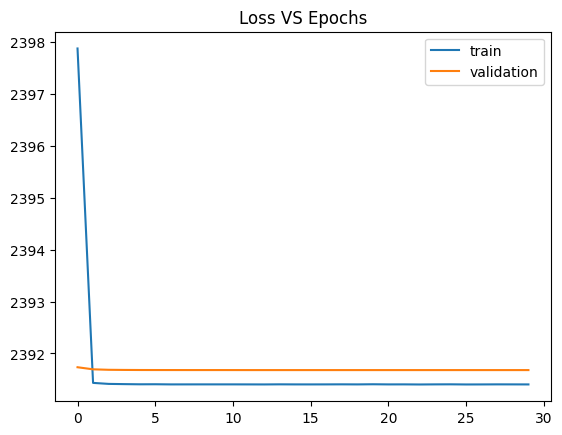

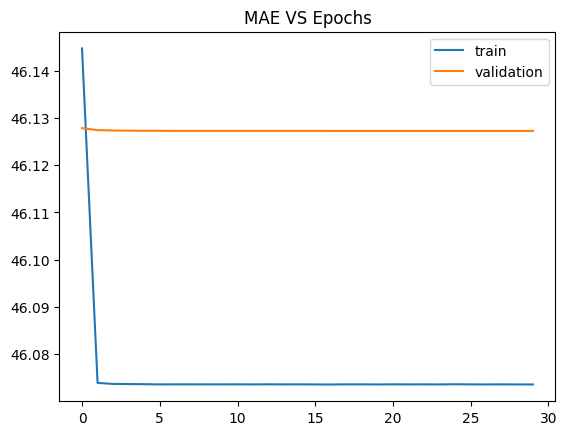

In [198]:
plt.figure()
plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")
plt.legend()
plt.title("Loss VS Epochs")
plt.show()

plt.figure()
plt.plot(epochs, accuracy, label="train")
plt.plot(epochs, val_accuracy, label="validation")
plt.legend()
plt.title("MAE VS Epochs")
plt.show()

In [199]:
def create_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(12,), name="hidden_1"))
    model.add(Dense(32, activation='relu', name="hidden_2"))
    model.add(Dense(1, activation='relu', name="output"))
    model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mae'])
    return model

In [200]:
model = create_model()

In [201]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_1 (Dense)            (None, 64)                832       
                                                                 
 hidden_2 (Dense)            (None, 32)                2080      
                                                                 
 output (Dense)              (None, 1)                 33        
                                                                 
Total params: 2,945
Trainable params: 2,945
Non-trainable params: 0
_________________________________________________________________


In [202]:
history = model.fit(X_train_nn, y_train, epochs=30, batch_size=256, validation_split=0.2, verbose=1)

Epoch 1/30
494/494 [==============================] - 2s 3ms/step - loss: 705.2062 - mae: 19.6302 - val_loss: 322.5990 - val_mae: 12.3630
Epoch 2/30
494/494 [==============================] - 1s 3ms/step - loss: 262.1051 - mae: 12.2285 - val_loss: 259.0242 - val_mae: 12.0301
Epoch 3/30
494/494 [==============================] - 1s 3ms/step - loss: 241.6985 - mae: 12.0980 - val_loss: 241.5216 - val_mae: 11.9203
Epoch 4/30
494/494 [==============================] - 1s 3ms/step - loss: 234.9122 - mae: 12.0146 - val_loss: 234.2129 - val_mae: 11.8856
Epoch 5/30
494/494 [==============================] - 2s 3ms/step - loss: 231.0226 - mae: 11.9363 - val_loss: 229.4565 - val_mae: 11.8062
Epoch 6/30
494/494 [==============================] - 1s 3ms/step - loss: 226.1927 - mae: 11.8236 - val_loss: 222.3787 - val_mae: 11.6086
Epoch 7/30
494/494 [==============================] - 2s 3ms/step - loss: 220.2778 - mae: 11.6759 - val_loss: 216.6761 - val_mae: 11.4837
Epoch 8/30
494/494 [==============

In [203]:
epochs = history.epoch
loss = history.history["loss"]
accuracy = history.history["mae"]
val_loss = history.history["val_loss"]
val_accuracy = history.history["val_mae"]

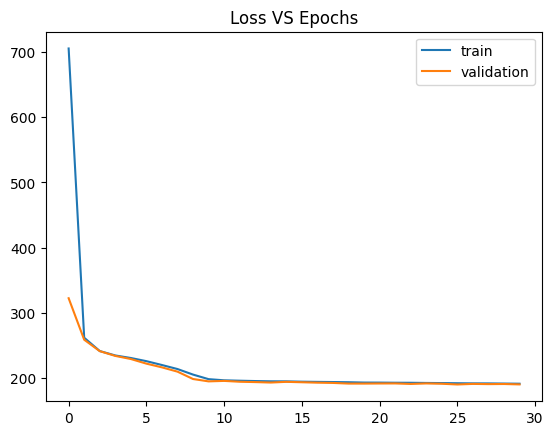

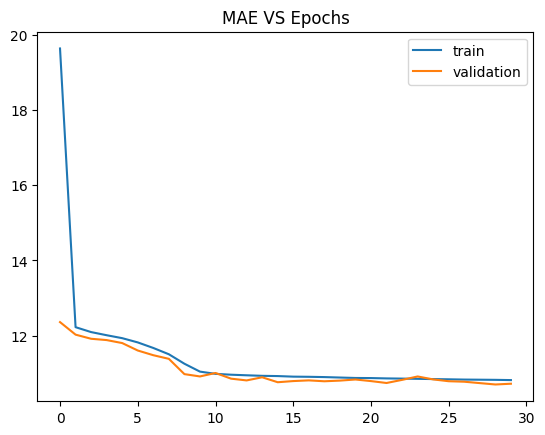

In [204]:
plt.figure()
plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")
plt.legend()
plt.title("Loss VS Epochs")
plt.show()

plt.figure()
plt.plot(epochs, accuracy, label="train")
plt.plot(epochs, val_accuracy, label="validation")
plt.legend()
plt.title("MAE VS Epochs")
plt.show()

In [217]:
def create_model():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(12,), name="hidden_1"))
    model.add(Dense(64, activation='relu', name="hidden_2"))
    model.add(Dense(32, activation='relu', name="hidden_3"))
    model.add(Dense(1, activation='relu', name="output"))
    model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mae'])
    return model

In [218]:
model = create_model()

In [219]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_1 (Dense)            (None, 128)               1664      
                                                                 
 hidden_2 (Dense)            (None, 64)                8256      
                                                                 
 hidden_3 (Dense)            (None, 32)                2080      
                                                                 
 output (Dense)              (None, 1)                 33        
                                                                 
Total params: 12,033
Trainable params: 12,033
Non-trainable params: 0
_________________________________________________________________


In [220]:
history = model.fit(X_train_nn, y_train, epochs=30, batch_size=256, validation_split=0.2, verbose=1)

Epoch 1/30
494/494 [==============================] - 3s 5ms/step - loss: 493.0790 - mae: 15.6185 - val_loss: 277.8198 - val_mae: 12.0959
Epoch 2/30
494/494 [==============================] - 2s 4ms/step - loss: 243.9487 - mae: 12.0390 - val_loss: 236.5350 - val_mae: 11.9068
Epoch 3/30
494/494 [==============================] - 2s 4ms/step - loss: 230.3852 - mae: 11.9068 - val_loss: 227.7897 - val_mae: 11.7511
Epoch 4/30
494/494 [==============================] - 2s 4ms/step - loss: 225.6959 - mae: 11.8155 - val_loss: 221.3873 - val_mae: 11.6311
Epoch 5/30
494/494 [==============================] - 2s 4ms/step - loss: 221.3268 - mae: 11.7072 - val_loss: 218.0723 - val_mae: 11.5030
Epoch 6/30
494/494 [==============================] - 2s 4ms/step - loss: 216.1147 - mae: 11.5656 - val_loss: 209.5951 - val_mae: 11.3111
Epoch 7/30
494/494 [==============================] - 2s 4ms/step - loss: 206.3937 - mae: 11.2863 - val_loss: 198.5161 - val_mae: 11.1502
Epoch 8/30
494/494 [==============

In [221]:
epochs = history.epoch
loss = history.history["loss"]
accuracy = history.history["mae"]
val_loss = history.history["val_loss"]
val_accuracy = history.history["val_mae"]

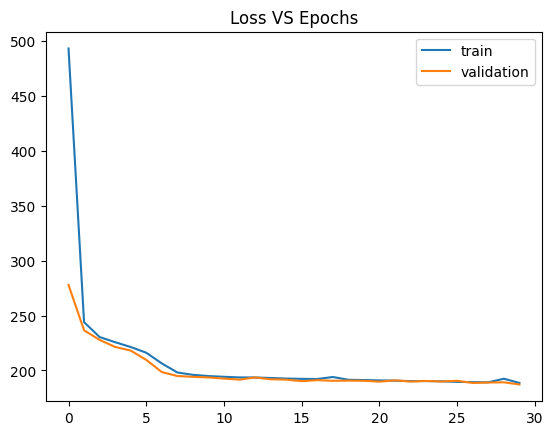

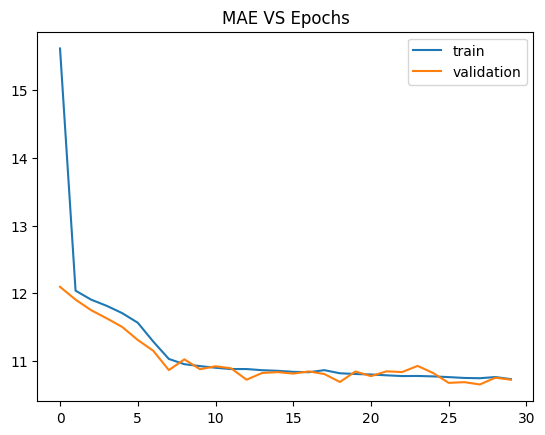

In [222]:
plt.figure()
plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")
plt.legend()
plt.title("Loss VS Epochs")
plt.show()

plt.figure()
plt.plot(epochs, accuracy, label="train")
plt.plot(epochs, val_accuracy, label="validation")
plt.legend()
plt.title("MAE VS Epochs")
plt.show()

In [233]:
NN_prediction = model.predict(X_test_nn)

1234/1234 [==============================] - 2s 2ms/step


In [234]:
RF_prediction = rf_reg.predict(X_test)

In [240]:
pred_df = pd.DataFrame({'rf_pred':RF_prediction, 'nn_pred':NN_prediction.flatten()})

In [241]:
pred_df

,rf_pred,nn_pred
0,39.786549,38.030582
1,39.459885,36.701401
2,50.434316,50.321270
3,44.810880,41.406281
4,38.568797,40.697468
...,...,...
39453,39.345110,36.826401
39454,61.732478,66.580421
39455,44.183876,47.837833
39456,50.214470,51.855480
